# Chapter 5 - Parsing
파싱-훈련 데이터 분석하기

http://www.nltk.org/howto/parse.html

In [1]:
# 구문분석 : 'formal grammer'를 기준으로 문법검사
# 1 Treebak의 문맥 자유문법 규칙 추출
# 2 CFG에서 확률적 문맥 자유 문법을 생성 (CFG(문맥 자유 문법) : Context Free Grammer)
# 3 CYK 차트 파싱 알고리즘
# 4 Earley 차트 파싱 알고리즘  ('차트 파싱'은 동적 프로그래밍 접근방식을 따른다)
# 5 '구문구조', '담화구조', '형태론적 계도'등 기준을 갖고서 파싱한다

<br></br>
## 1 Parsing
형식문법(formal Grammer)으로 정의된 규칙에 부합여부를 찾는 작업

### 01 Tree bank corpus
트리뱅크 구성

In [2]:
# corpus가 저장된 파일의 목록 살펴보기
import nltk,  nltk.corpus
print(str(nltk.corpus.treebank).replace('\\\\','/'))
print(nltk.corpus.treebank.fileids()[::50])   # .fileids() : 파일에 대한 식별자

<BracketParseCorpusReader in '.../corpora/treebank/combined' (not loaded yet)>
['wsj_0001.mrg', 'wsj_0051.mrg', 'wsj_0101.mrg', 'wsj_0151.mrg']


In [3]:
# 개별 파일의 corpus 살펴보기
from nltk.corpus import treebank
print(treebank.words('wsj_0007.mrg'))        # 단어 확인
print(treebank.tagged_words('wsj_0007.mrg')) # 단어와 Tagging 확인

['McDermott', 'International', 'Inc.', 'said', '0', ...]
[('McDermott', 'NNP'), ('International', 'NNP'), ...]


In [4]:
# Penn Treebak corpus의 코드내용 살펴보기
# corpus 구조도 살펴보기
# import nltk
# from nltk.corpus import treebank
print(treebank.parsed_sents('wsj_0007.mrg')[2])

(S
  (NP-SBJ
    (NP (NNP Bailey) (NNP Controls))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Wickliffe)) (, ,) (NP (NNP Ohio)))))
    (, ,))
  (VP
    (VBZ makes)
    (NP
      (JJ computerized)
      (JJ industrial)
      (NNS controls)
      (NNS systems)))
  (. .))


(S
  (NP Mr./NNP Vinken/NNP)
  is/VBZ
  (NP chairman/NN)
  of/IN
  (NP Elsevier/NNP N.V./NNP)
  ,/,
  (NP the/DT Dutch/NNP publishing/VBG group/NN)
  ./.)


/home/markbaum/Python/python36/lib/python3.6/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


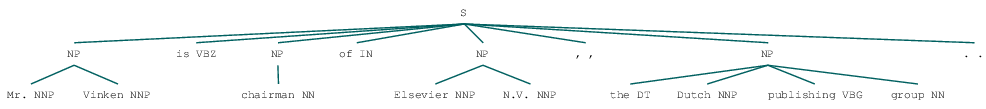

In [5]:
# corpus 구조도 시각화 하기
%matplotlib inline
# import nltk
from nltk.corpus import treebank_chunk

print(treebank_chunk.chunked_sents()[1])
treebank_chunk.chunked_sents()[1]  # .draw() # 외부 화면으로 출력

In [6]:
# Treebak에 포함된 chunk의 총 수
# import nltk
# from nltk.corpus import treebank_chunk
print('.leaves() \n',treebank_chunk.chunked_sents()[1].leaves())
print('\n.pos()  \n',treebank_chunk.chunked_sents()[1].pos())
print('\n.productions() \n',treebank_chunk.chunked_sents()[1].productions())

.leaves() 
 [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')]

.pos()  
 [(('Mr.', 'NNP'), 'NP'), (('Vinken', 'NNP'), 'NP'), (('is', 'VBZ'), 'S'), (('chairman', 'NN'), 'NP'), (('of', 'IN'), 'S'), (('Elsevier', 'NNP'), 'NP'), (('N.V.', 'NNP'), 'NP'), ((',', ','), 'S'), (('the', 'DT'), 'NP'), (('Dutch', 'NNP'), 'NP'), (('publishing', 'VBG'), 'NP'), (('group', 'NN'), 'NP'), (('.', '.'), 'S')]

.productions() 
 [S -> NP ('is', 'VBZ') NP ('of', 'IN') NP (',', ',') NP ('.', '.'), NP -> ('Mr.', 'NNP') ('Vinken', 'NNP'), NP -> ('chairman', 'NN'), NP -> ('Elsevier', 'NNP') ('N.V.', 'NNP'), NP -> ('the', 'DT') ('Dutch', 'NNP') ('publishing', 'VBG') ('group', 'NN')]


/home/markbaum/Python/python36/lib/python3.6/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


In [7]:
# Question !!!!
# 위 print(treebank_chunk.chunked_sents()[1] 뒤에 붙은 '메서드'들은
# 무슨 이유로 개별적인 구별을 한 것인가??? 구별한 내용의 정의는??

In [8]:
# 품사 주석
print('Tags :',len(nltk.corpus.treebank.tagged_words()))
nltk.corpus.treebank.tagged_words()

Tags : 100676


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [9]:
# tag 의 빈도 계산하기는 아래의 코드를 활용한다
# import nltk
# from nltk.corpus import treebank
from nltk.probability import FreqDist

sentence = '''I got a messsage form our President of Unite state of America, 
You should know where this message came from, or You could be easy to ignored it'''
fd = FreqDist(sentence)
print(fd.items())

dict_items([('I', 1), (' ', 27), ('g', 4), ('o', 14), ('t', 8), ('a', 7), ('m', 6), ('e', 15), ('s', 10), ('f', 4), ('r', 8), ('u', 5), ('P', 1), ('i', 6), ('d', 4), ('n', 4), ('U', 1), ('A', 1), ('c', 3), (',', 2), ('\n', 1), ('Y', 2), ('h', 3), ('l', 2), ('k', 1), ('w', 2), ('b', 1), ('y', 1)])


In [10]:
# sinica_treebank 를 살펴보자 : 대륙의 힘이다!!
# import nltk
from nltk.corpus import sinica_treebank
print(sinica_treebank.sents())
print(sinica_treebank.parsed_sents()[27])

[['一'], ['友情'], ['嘉珍', '和', '我', '住在', '同一條', '巷子'], ...]
(S
  (NP (NP (N‧的 (Nhaa 我) (DE 的)) (Ncb 腦海)) (Ncda 中))
  (Dd 頓時)
  (DM 一片)
  (VH11 空白))


<br></br>
## 2 Treebank의 문맥 자유문법 규칙 추출
CFG : Context Free Grammer 는 '노암촘스키'의 기준으로 정의한 문법이다

### 01 단일 Tag 추출 및 비교하기
from nltk import Nonterminal

In [11]:
# 문장구조 4분류 내용
# 1 선언적 구조 : 서술문                (주어 다음 서술어)
# 2 명령형 구조 : 명령문, 명령 또는 제안문 (동사구로 시작하고, 별도 주어문을 포함하지 않는다)
# 3 예/ 아니오 구조 : 질의/ 응답문
# 4 Wh- 질의구조   : 질의/ 응답문  (Wh-로 문장을 시작)

In [12]:
# 단일 Tag의 추출 및 비교
import nltk
from nltk import Nonterminal

# 얘는 그냥 출력만 하는건가? Tag에 대한 유효성검사도 없는듯 
Nonterminal('Korea')

Korea

In [13]:
nonterminal1 = Nonterminal('NP')
print(nonterminal1.symbol())
nonterminal1.unicode_repr()

NP


'NP'

In [14]:
nonterminal2 = Nonterminal('VP')
nonterminal3 = Nonterminal('PP')
print(nonterminal1 == nonterminal2)
print(nonterminal2 == nonterminal3)
print(nonterminal1 == nonterminal3)

False
False
False


### 02 복수의 Tag 추출 및 비교
from nltk import nonterminals (소문자)

문장구조 : S -->  NP, VP  2단계 까지만 분석이 가능  (S -> NP, VP -> NP 는 오류!!!)

In [15]:
# 복수 tag의 추출 및 비교
from nltk import nonterminals, Production
nonterminals('South Korea is positioned between Japan and China')

S, NP, VP, PP = nonterminals('S, NP, VP, PP')
N, V, P, DT = nonterminals('N, V, P, DT')
production1 = Production(S, [NP, VP])
print(production1)
production2 = Production(NP, [DT, NP])
print(production2)
production3 = Production(VP, [V, NP,NP,PP])
print(production3)

S -> NP VP
NP -> DT NP
VP -> V NP NP PP


In [16]:
print(production1.lhs()) # Left  tag 추출
print(production1.rhs()) # Right tag 추출
print(production3.lhs())
print(production3.rhs())

S
(NP, VP)
VP
(V, NP, NP, PP)


In [17]:
print(production3 == Production(VP, [V,NP,NP,PP]))
print(production2 == production3)

True
False


### 02 ATIS 문법을 활용
Advanced Research Projects Agency Spoken Language Systems

https://catalog.ldc.upenn.edu/LDC95S26  : 공항안내 시스템 개발용

http://users.sussex.ac.uk/~johnca/cfg-resources/

In [18]:
# ATIS 문법에 접속
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
gram1 
# print(gram1) 하면 자세한 내용을 알 수 있다.. 
# 근데 그 내용이 뭥미???
# print(gram1)
# Grammar with 5517 productions (start state = SIGMA)
#     ABBCL_NP -> QUANP_DTI QUANP_DTI QUANP_CD AJP_JJ NOUN_NP PRPRTCL_VBG
#     ADJ_ABL -> only
#     ADJ_ABL -> such
#     ADJ_AP -> pt_adj_ap
#     ADJ_AP -> other

<Grammar with 5517 productions>

In [19]:
import nltk
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
print(len(sent))

98


In [20]:
testingsent = sent[25]
print(testingsent[1])
print(testingsent[0])

11
['list', 'those', 'flights', 'that', 'stop', 'over', 'in', 'salt', 'lake', 'city', '.']


In [21]:
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent = sent[25]
sent = testingsent[0]
sent

['list',
 'those',
 'flights',
 'that',
 'stop',
 'over',
 'in',
 'salt',
 'lake',
 'city',
 '.']

In [22]:
# Bottom Up 방식의 파싱을 수행한다
parser1 = nltk.parse.BottomUpChartParser(gram1)
chart1 = parser1.chart_parse(sent)
print((chart1.num_edges()))
print((len(list(chart1.parses(gram1.start())))))

13454
11


In [23]:
# Bottom-up, Left Corner 방식의 파싱
# 질문 : 이게 무슨말이야 방구야??
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent = sent[25]
sent = testingsent[0]
parser2 = nltk.parse.BottomUpLeftCornerChartParser(gram1)
chart2 = parser2.chart_parse(sent)
print((chart2.num_edges()))
print((len(list(chart2.parses(gram1.start())))))

8781
11


In [24]:
# Bottom-up 필터를 사용한 Left Corner 방식의 파싱
# 질문 : 바로 위 예제와 여기의 필터는 무슨 차이를 갖는거지??
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent=sent[25]
sent=testingsent[0]
parser3 = nltk.parse.LeftCornerChartParser(gram1)
chart3 = parser3.chart_parse(sent)
print((chart3.num_edges()))
print((len(list(chart3.parses(gram1.start())))))

1280
11


In [25]:
# Top-down 의 파싱
# 얜 또 뭐래???
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent = sent[25]
sent = testingsent[0]
parser4 = nltk.parse.TopDownChartParser(gram1)
chart4 = parser4.chart_parse(sent)
print((chart4.num_edges()))
print((len(list(chart4.parses(gram1.start())))))

37763
11


In [26]:
# Incremental(증가하는) Bottom-up 파싱
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent = sent[25]
sent = testingsent[0]
parser5 = nltk.parse.IncrementalBottomUpChartParser(gram1)
chart5 = parser5.chart_parse(sent)
print((chart5.num_edges()))
print((len(list(chart5.parses(gram1.start())))))

13454
11


In [27]:
# Incremental(증가하는) Bottom-up, Left Corner 파싱
import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent=sent[25]
sent=testingsent[0]
parser6 = nltk.parse.IncrementalBottomUpLeftCornerChartParser(gram1)
chart6 = parser6.chart_parse(sent)
print((chart6.num_edges()))
print((len(list(chart6.parses(gram1.start())))))

8781
11


In [28]:
# Bottom-up 필터를 사용한 Incremental(증가하는) Left Corner 파싱

import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent=sent[25]
sent=testingsent[0]
parser7 = nltk.parse.IncrementalLeftCornerChartParser(gram1)
chart7 = parser7.chart_parse(sent)
print((chart7.num_edges()))
print((len(list(chart7.parses(gram1.start())))))

1280
11


In [29]:
# Incremental(증가하는) Top down 파싱

import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent=sent[25]
sent=testingsent[0]
parser8 = nltk.parse.IncrementalTopDownChartParser(gram1)
chart8 = parser8.chart_parse(sent)
print((chart8.num_edges()))
print((len(list(chart8.parses(gram1.start())))))

37763
11


In [30]:
# Earley 파싱

import nltk
gram1 = nltk.data.load('grammars/large_grammars/atis.cfg')
sent = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
sent = nltk.parse.util.extract_test_sentences(sent)
testingsent=sent[25]
sent=testingsent[0]
parser9 = nltk.parse.EarleyChartParser(gram1)
chart9 = parser9.chart_parse(sent)
print((chart9.num_edges()))
print((len(list(chart9.parses(gram1.start())))))

37763
11


<br></br>
## 3 확률적 문맥 자유 문법 생성
PCFG : Probabilistic Context-free Grammer

In [31]:
import nltk
from nltk.corpus import treebank
from itertools import islice
from nltk.grammar import PCFG, induce_pcfg, toy_pcfg1, toy_pcfg2
gram2 = PCFG.fromstring("""
    A -> B B [.3] | C B C [.7]
    B -> B D [.5] | C [.5]
    C -> 'a' [.1] | 'b' [0.9]
    D -> 'b' [1.0]
    """)
print(gram2.start())
print(gram2.productions())

A
[A -> B B [0.3], A -> C B C [0.7], B -> B D [0.5], B -> C [0.5], C -> 'a' [0.1], C -> 'b' [0.9], D -> 'b' [1.0]]


In [32]:
prod1 = gram2.productions()[0]
print(prod1)

A -> B B [0.3]


In [33]:
prod2 = gram2.productions()[1]
print(prod2)
print(prod2.lhs())
print(prod2.rhs())
print((prod2.prob()))

A -> C B C [0.7]
A
(C, B, C)
0.7


In [34]:
# 확률적 차트 파싱
import nltk
from nltk.corpus import treebank
from itertools import islice
from nltk.grammar import PCFG, induce_pcfg, toy_pcfg1, toy_pcfg2
tokens = "Jack told Bob to bring my cookie".split()
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


<br></br>
## 4 CKY 차트 파싱 알고리즘
Recursive Descent (귀납/회귀적 감소) 파싱의 단점은, 좌측 방향 재귀문제를 발생하여 복잡하다

이를 극복하기 위해, CYK은 '동적 프로그래밍 접근'으로 $N^3$ 시간에 차트를 완성 가능하다

CYK, Earley 모두 Bottom-up 차트 파싱 알고리즘을 활용한다

https://stackoverflow.com/questions/26415163/python-nltk-cant-import-parse-cfg

In [35]:
# CYK파싱 예제
from nltk import CFG
tok = ["the", "kids", "opened", "the", "box", "on", "the", "floor"]

gram = CFG.fromstring("""
    S -> NP VP
    NP -> Det N | NP PP
    VP -> V NP | VP PP
    PP -> P NP
    Det -> 'the'
    N -> 'kids' | 'box' | 'floor'
    V -> 'opened' 
    P -> 'on'""")
gram

<Grammar with 12 productions>

In [36]:
from nltk import PCFG
toy_pcfg1 = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
    Det -> 'the' [0.8] | 'my' [0.2]
    N -> 'man' [0.5] | 'telescope' [0.5]
    VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
    V -> 'ate' [0.35] | 'saw' [0.65]
    PP -> P NP [1.0]
    P -> 'with' [0.61] | 'under' [0.39] """)

In [37]:
# 초기화 테이블을 구성하는 함수
def init_nfst(tok, gram):
    numtokens1 = len(tok)
    # fill w/ dots
    nfst = [["." for i in range(numtokens1+1)]   for j in range(numtokens1+1)]
    # 대각선으로 채우기
    for i in range(numtokens1):
        prod = gram.productions(rhs=tok[i])
        nfst[i][i+1] = prod[0].lhs()
    return nfst

In [38]:
# 테이블을 구성하는 코드
def complete_nfst(nfst, tok, trace=False):
    index1 = {} 
    for prod in gram.productions():
        #make lookup reverse
        index1[prod.rhs()] = prod.lhs()
        numtokens1 = len(tok) 
    for span in range(2, numtokens1 +1):
        for start in range(numtokens1 +1 -span):
            #go down towards diagonal
            end1 = start + span 
        for mid in range(start +1, end1):
            nt1, nt2 = nfst[start][mid], nfst[mid][end1]
    if (nt1,nt2) in index1:
        if trace:
            print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" %\
                  (start, nt1, mid1, nt2, end1, start, index1[(nt1,nt2)], end)) 
    nfst[start1][end1] = index1[(nt1,nt2)]
    return nfst

In [39]:
# # 디스플레이 테이블을 구성
# def display(wfst, tok):
#     print('\nWFST ' + ' '.join([("%-4d" % i) for i in range(1,len(wfst))]))
#     for i in range(len(wfst)-1):
#         print("%d " % i)
#         for j in range(1, len(wfst)):
#             print("%-4s" % wfst[i][j])

In [40]:
# 코드의 결과를 출력
tok = ["the", "kids", "opened", "the", "box", "on", "the", "floor"]
res1 = init_nfst(tok, gram)
display(res1, tok)

[['.', Det, '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', N, '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', V, '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', Det, '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', N, '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', P, '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', Det, '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', N],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.']]

['the', 'kids', 'opened', 'the', 'box', 'on', 'the', 'floor']

In [41]:
# res2 = complete_nfst(res1,tok)
# display(res2, tok)

<br></br>
## 5 Earley 차트 파싱 알고리즘
1970년 발표한 알고리즘으로 Top-Down 파싱과 유사

좌측방향 재귀처리를 하며, CNF를 필요로 한다

In [42]:
# NLTK 차트파서를 사용한 파싱

import nltk
# AssertionError: Not all parses found   # 오류가 발생
# nltk.parse.chart.demo(print_times=False, trace=1,sent='I saw a dog', numparses=2)
# nltk.parse.chart.demo(5, print_times=False, trace=1,sent='John saw a dog', numparses=2)
nltk.parse.chart.demo(2, print_times=False, trace=1, sent='John saw a dog', numparses=1)

* Sentence:
John saw a dog
['John', 'saw', 'a', 'dog']

* Strategy: Bottom-up

|.   John  .   saw   .    a    .   dog   .|
|[---------]         .         .         .| [0:1] 'John'
|.         [---------]         .         .| [1:2] 'saw'
|.         .         [---------]         .| [2:3] 'a'
|.         .         .         [---------]| [3:4] 'dog'
|>         .         .         .         .| [0:0] NP -> * 'John'
|[---------]         .         .         .| [0:1] NP -> 'John' *
|>         .         .         .         .| [0:0] S  -> * NP VP
|>         .         .         .         .| [0:0] NP -> * NP PP
|[--------->         .         .         .| [0:1] S  -> NP * VP
|[--------->         .         .         .| [0:1] NP -> NP * PP
|.         >         .         .         .| [1:1] Verb -> * 'saw'
|.         [---------]         .         .| [1:2] Verb -> 'saw' *
|.         >         .         .         .| [1:1] VP -> * Verb NP
|.         >         .         .         .| [1:1] VP -> * Verb
|.     

In [43]:
# NLTK Feature 차트파싱
import nltk
nltk.parse.featurechart.demo( print_times = False, 
        print_grammar = True, parser = nltk.parse.featurechart.FeatureChartParser, 
        sent = 'I saw a dog' )


Grammar with 18 productions (start state = S[])
    S[] -> NP[] VP[]
    PP[] -> Prep[] NP[]
    NP[] -> NP[] PP[]
    VP[] -> VP[] PP[]
    VP[] -> Verb[] NP[]
    VP[] -> Verb[]
    NP[] -> Det[pl=?x] Noun[pl=?x]
    NP[] -> 'John'
    NP[] -> 'I'
    Det[] -> 'the'
    Det[] -> 'my'
    Det[-pl] -> 'a'
    Noun[-pl] -> 'dog'
    Noun[-pl] -> 'cookie'
    Verb[] -> 'ate'
    Verb[] -> 'saw'
    Prep[] -> 'with'
    Prep[] -> 'under'

* FeatureChartParser
Sentence: I saw a dog
|. I .saw. a .dog.|
|[---]   .   .   .| [0:1] 'I'
|.   [---]   .   .| [1:2] 'saw'
|.   .   [---]   .| [2:3] 'a'
|.   .   .   [---]| [3:4] 'dog'
|[---]   .   .   .| [0:1] NP[] -> 'I' *
|[--->   .   .   .| [0:1] S[] -> NP[] * VP[] {}
|[--->   .   .   .| [0:1] NP[] -> NP[] * PP[] {}
|.   [---]   .   .| [1:2] Verb[] -> 'saw' *
|.   [--->   .   .| [1:2] VP[] -> Verb[] * NP[] {}
|.   [---]   .   .| [1:2] VP[] -> Verb[] *
|.   [--->   .   .| [1:2] VP[] -> VP[] * PP[] {}
|[-------]   .   .| [0:2] S[] -> NP[] VP[] *
|. 

In [44]:
# Earley 알고리즘을 구현한 NLTK코드
# A demonstration of the Earley parsers.
def demo(print_times = True, print_grammar = False,
         print_trees = True, trace = 2,
         sent = 'I saw John with a dog with my cookie', 
         numparses=5):

    import sys, time
    from nltk.parse.chart import demo_grammar
    
    # The grammar for ChartParser and SteppingChartParser:
    grammar = demo_grammar()
    if print_grammar:
        print("* Grammar", grammar)
        # 샘플문장을 토큰화 한다
        print("* Sentence:", sent)
        tokens = sent.split()
        print(tokens)

    # 파싱 작업을 시작한다.
    earley = EarleyChartParser(grammar, trace=trace)
    t = time.clock()
    chart = earley.chart_parse(tokens)
    parses = list(chart.parses(grammar.start()))
    t = time.clock() - t
    # 결과를 출력한다
    if numparses: 
        assert len(parses) == numparses, 'Not all parses found'
    if print_trees:
        for tree in parses:
            print(tree)
        else: print("Nr trees:", len(parses))
    if print_times: 
        print("Time:", t)

    if __name__ == '__main__':
        demo()